In [1]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
import os
print(os.listdir("../23-Final-Project/Data"))

['Data_Dictionary.xlsx', 'historical-10-lines.csv', 'historical-100-lines.csv', 'historical-1000-lines.csv', 'historical-10000-lines.csv', 'historical-100000-lines.csv', 'historical_transactions.csv', 'hist_small.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'pipelined_test.csv', 'pipelined_train.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
#train.csv - the training set
#test.csv - the test set
#sample_submission.csv - a sample submission file in the correct format - contains all card_ids you are expected to predict for.
#historical_transactions.csv - up to 3 months' worth of historical transactions for each card_id
#merchants.csv - additional information about all merchants / merchant_ids in the dataset.
#new_merchant_transactions.csv - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.


In [5]:
train = pd.read_csv("../23-Final-Project/Data/train.csv", parse_dates=["first_active_month"])
print("Details of train : ",train.shape)

Details of train :  (201917, 6)


In [6]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [7]:
#first_active_month : ''YYYY-MM', month of first purchase
#feature_1,2,3 : Anonymized card categorical feature
#target : Loyalty numerical score calculated 2 months after historical and evaluation period

In [10]:
test = pd.read_csv("../23-Final-Project/Data/test.csv", parse_dates=["first_active_month"])
print("Details of test : ",test.shape)

Details of test :  (123623, 5)


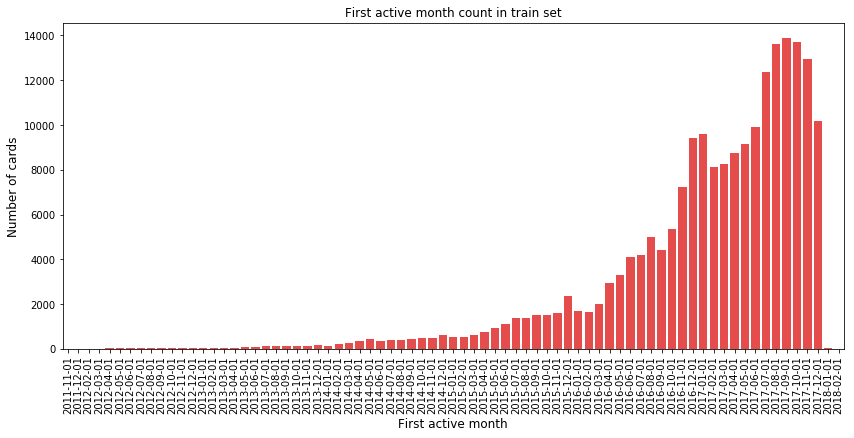

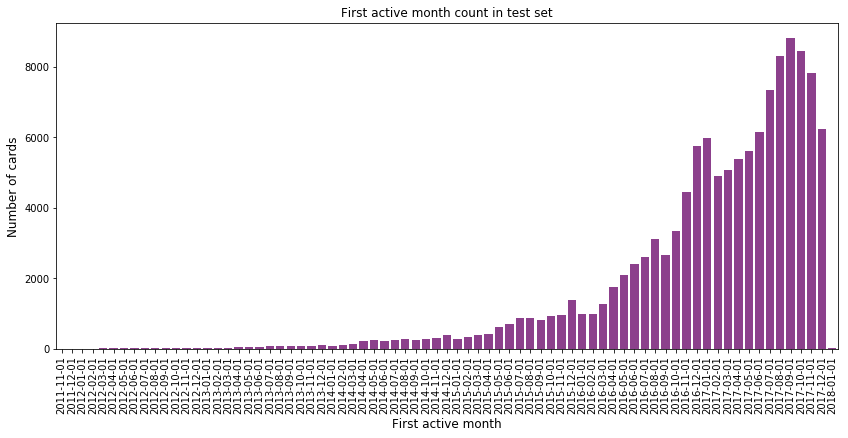

In [12]:
cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

cnt_srs = test['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='purple')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

In [13]:
# First_active_month of Train and Test looks similiar

In [14]:
train.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


In [15]:
# feature_1 - feature_3 has 0.58 but target - feature low correaltion value

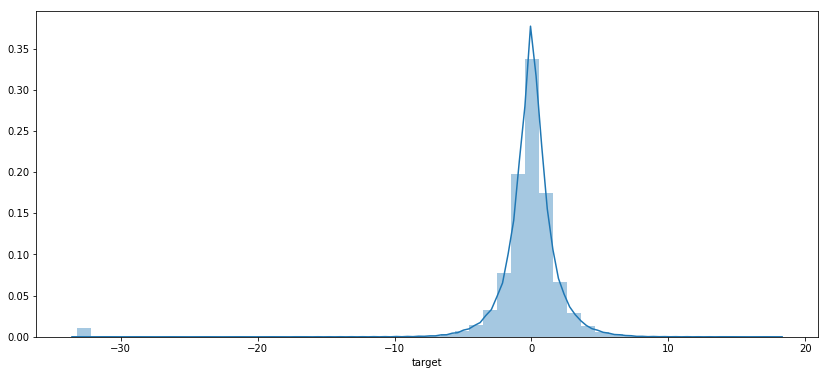

In [16]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(train['target'])

In [17]:
train['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

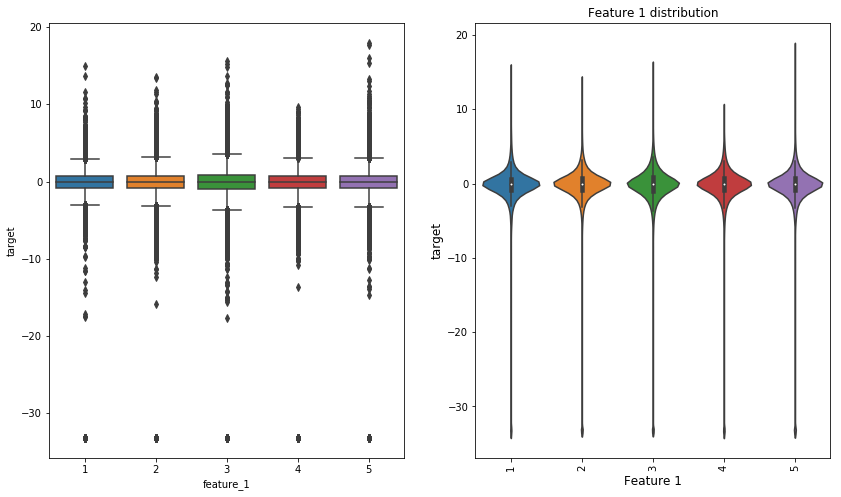

In [19]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_1']], axis=1)
fig = sns.boxplot(x='feature_1', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_1", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

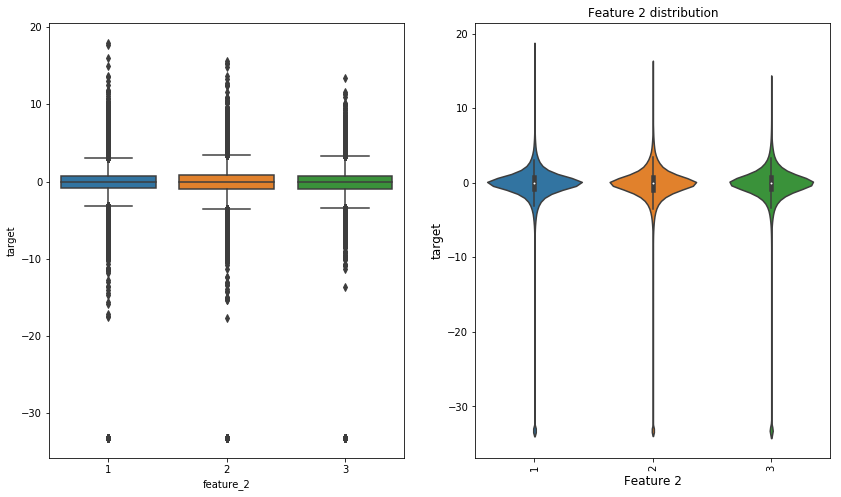

In [20]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_2']], axis=1)
fig = sns.boxplot(x='feature_2', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_2", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

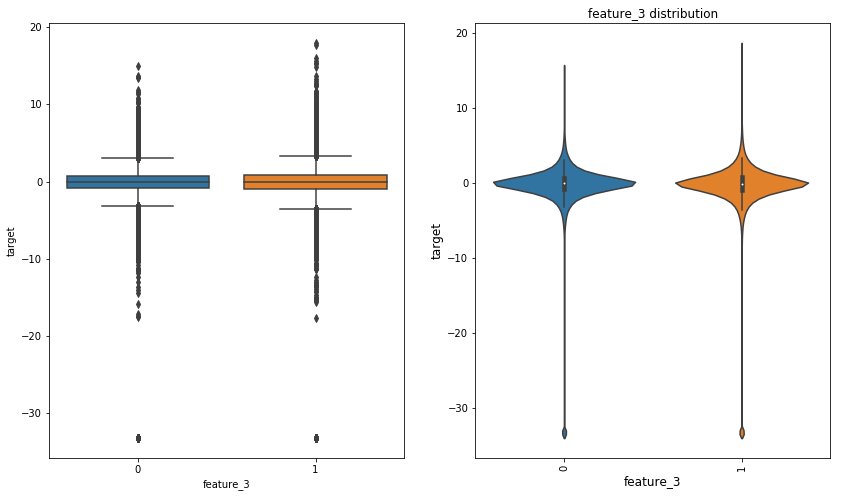

In [21]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_3']], axis=1)
fig = sns.boxplot(x='feature_3', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_3", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('feature_3', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("feature_3 distribution")
plt.show()

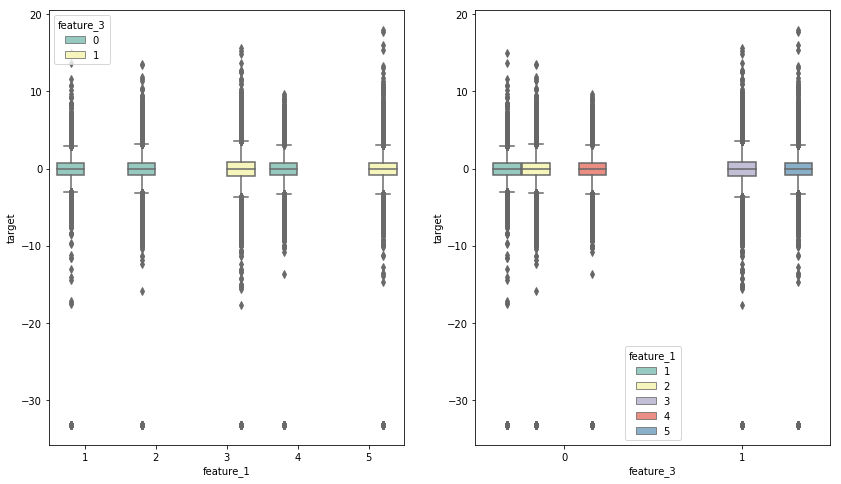

In [22]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_3",
               data=train, palette="Set3",ax=ax1)

sns.boxplot(x="feature_3", y="target", hue="feature_1",
               data=train, palette="Set3",ax=ax2)

In [23]:
# feature_3 has 1 when feautre_1 high than 3

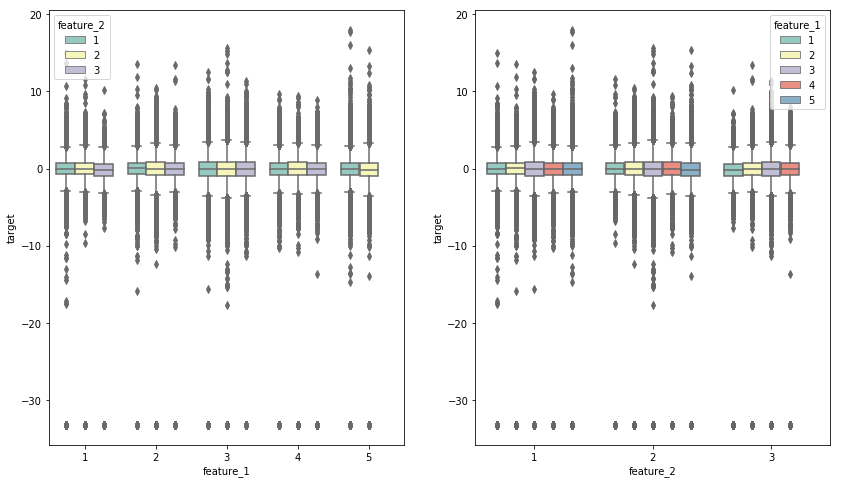

In [24]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_2",
               data=train, palette="Set3",ax=ax1)

sns.boxplot(x="feature_2", y="target", hue="feature_1",
               data=train, palette="Set3",ax=ax2)

In [25]:
# feature_2 has not 3 when feature_1 == 5 but what is target low than -30???

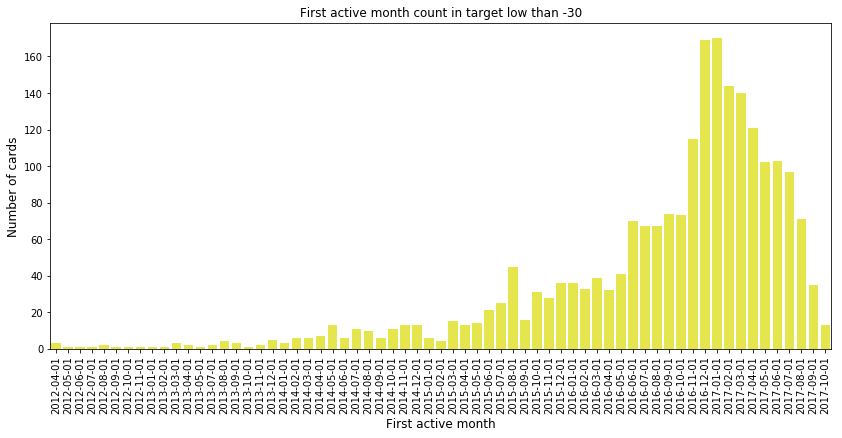

In [26]:
# Code in https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
# SRK - Simple Exploration Notebook 
train_low_m30 = train[train['target']<-30]
cnt_srs = train_low_m30['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='yellow')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in target low than -30")
plt.show()

In [27]:
train_low_m30.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.219281


In [28]:
# MISSING VALUE
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
target,0,0.0
feature_3,0,0.0
feature_2,0,0.0
feature_1,0,0.0
card_id,0,0.0
first_active_month,0,0.0


In [29]:
# checking missing data
total = test.isnull().sum().sort_values(ascending = False)
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
first_active_month,1,0.000809
feature_3,0,0.000000
feature_2,0,0.000000
feature_1,0,0.000000
card_id,0,0.000000


In [30]:
import datetime

for df in [train,test]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year'] = df['first_active_month'].dt.year
    df['month'] = df['first_active_month'].dt.month
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days

target = train['target']
del train['target']

In [31]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,year,month,elapsed_time
0,2017-06-01,C_ID_92a2005557,5,2,1,2017,6,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,2017,1,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,2016,8,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,2017,9,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,2017,11,92


In [33]:
# Simple Exploration : historical_transactions
ht = pd.read_csv("../23-Final-Project/Data/historical_transactions.csv")
print("Details of historical_transactions : ",ht.shape)

Details of historical_transactions :  (29112361, 14)


In [34]:
ht.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [35]:
# card_id : Card identifier
# month_lag : month lag to reference date
# purchase_date : Purchase date
# authorized_flag : Y' if approved, 'N' if denied
# category_3 : anonymized category
# installments : number of installments of purchase
# category_1 : anonymized category
# merchant_category_id : Merchant category identifier (anonymized )
# subsector_id : Merchant category group identifier (anonymized )
# merchant_id : Merchant identifier (anonymized)
# purchase_amount : Normalized purchase amount
# city_id : City identifier (anonymized )
# state_id : State identifier (anonymized )
# category_2 : anonymized category

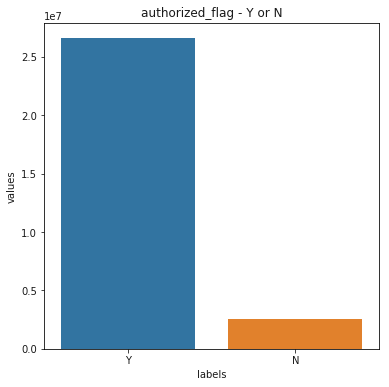

In [36]:
temp = ht["authorized_flag"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('authorized_flag - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

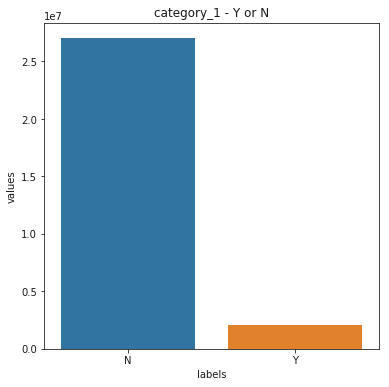

In [37]:
temp = ht["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

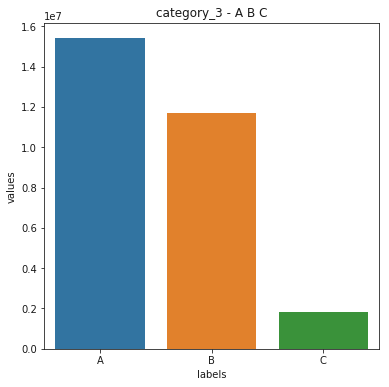

In [39]:
temp = ht["category_3"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_3 - A B C')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

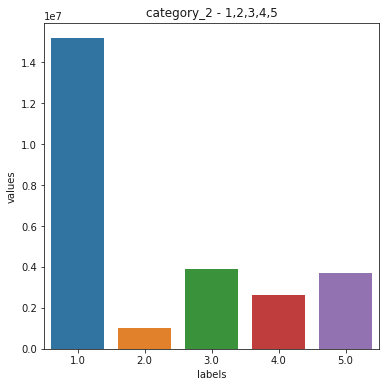

In [40]:
temp = ht["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 - 1,2,3,4,5')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

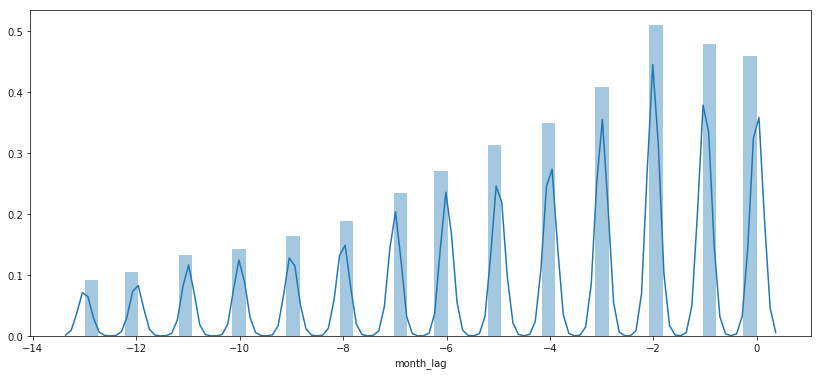

In [41]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['month_lag'])

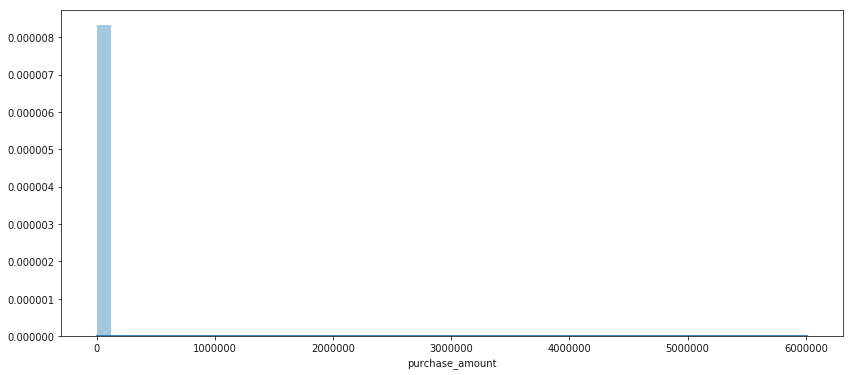

In [42]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['purchase_amount'])

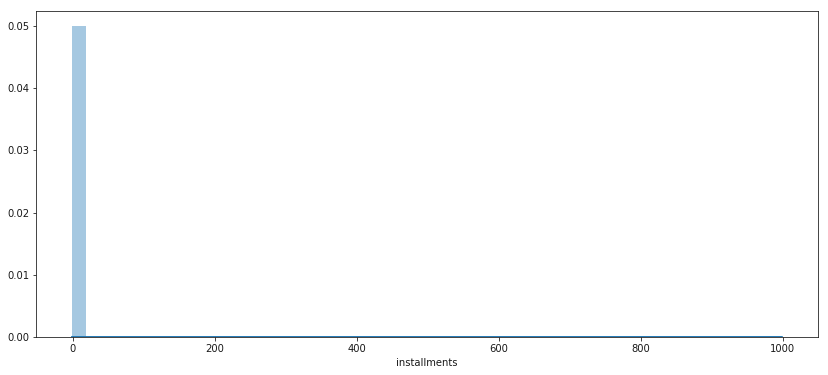

In [43]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['installments'])

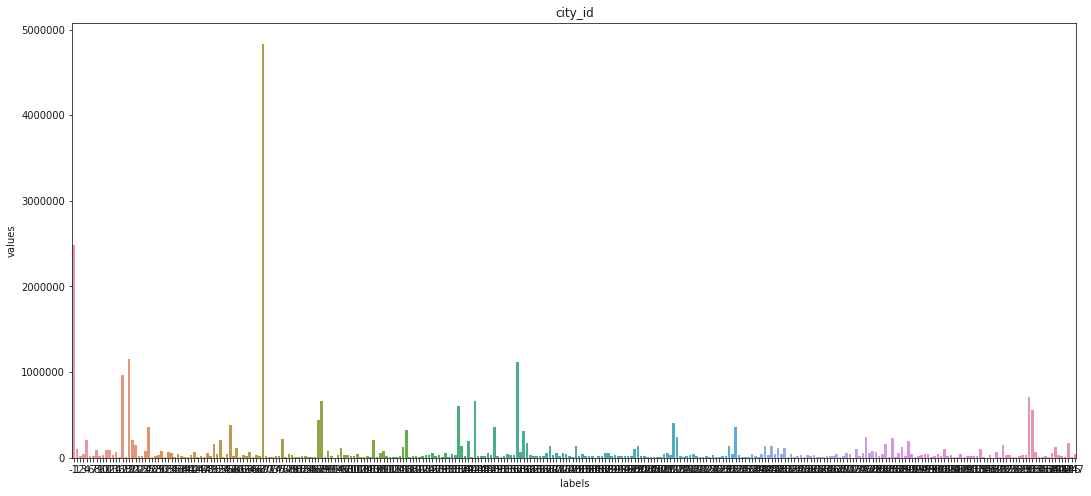

In [44]:
temp = ht["city_id"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (18,8))
plt.title('city_id')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [45]:
ht['authorized_flag'] = ht['authorized_flag'].map({'Y':1, 'N':0})

In [46]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max']
        }
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

history = aggregate_historical_transactions(ht)
del ht
gc.collect()

2725

In [47]:
train = pd.merge(train, history, on='card_id', how='left')
test = pd.merge(test, history, on='card_id', how='left')

In [48]:
# Simple Exploration : merchants.csv
merchant = pd.read_csv("../23-Final-Project/Data/merchants.csv")
print("Details of merchant : ",merchant.shape)

Details of merchant :  (334696, 22)


In [49]:
merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [50]:
# merchant_id : Unique merchant identifier
# merchant_group_id : Merchant group (anonymized )
# merchant_category_id : Unique identifier for merchant category (anonymized )
# subsector_id : Merchant category group (anonymized )
# numerical_1 : anonymized measure
# numerical_2 : anonymized measure
# category_1 : anonymized category
# most_recent_sales_range : Range of revenue (monetary units) in last active month --> A > B > C > D > E
# most_recent_purchases_range : Range of quantity of transactions in last active month --> A > B > C > D > E
# avg_sales_lag3 : Monthly average of revenue in last 3 months divided by revenue in last active month
# avg_purchases_lag3 : Monthly average of transactions in last 3 months divided by transactions in last active month
# active_months_lag3 : Quantity of active months within last 3 months
# avg_sales_lag6 : Monthly average of revenue in last 6 months divided by revenue in last active month
# avg_purchases_lag6 : Monthly average of transactions in last 6 months divided by transactions in last active month
# active_months_lag6 : Quantity of active months within last 6 months
# avg_sales_lag12 : Monthly average of revenue in last 12 months divided by revenue in last active month
# avg_purchases_lag12 : Monthly average of transactions in last 12 months divided by transactions in last active month
# active_months_lag12 : Quantity of active months within last 12 months
# category_4 : anonymized category
# city_id : City identifier (anonymized )
# state_id : State identifier (anonymized )
# category_2 : anonymized category

In [51]:
# checking missing data
total = merchant.isnull().sum().sort_values(ascending = False)
percent = (merchant.isnull().sum()/merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,11887,3.551581
avg_sales_lag3,13,0.003884
avg_sales_lag12,13,0.003884
avg_sales_lag6,13,0.003884
merchant_group_id,0,0.000000
merchant_category_id,0,0.000000
subsector_id,0,0.000000
numerical_1,0,0.000000
numerical_2,0,0.000000
category_1,0,0.000000


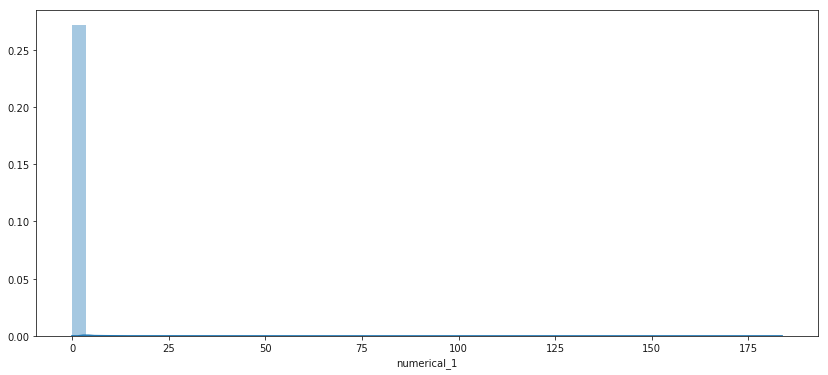

In [52]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(merchant['numerical_1'])

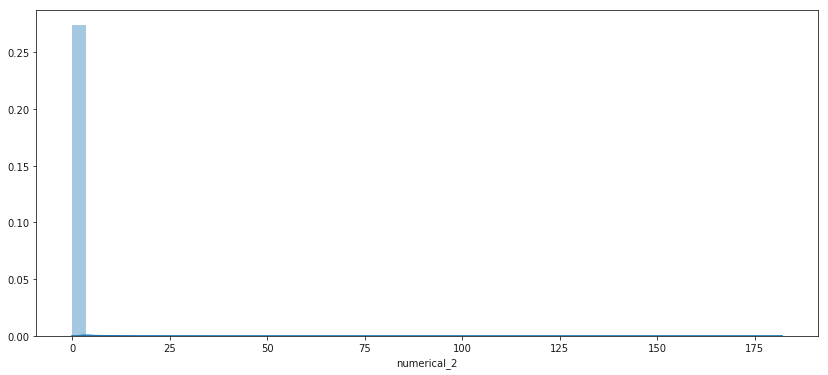

In [53]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(merchant['numerical_2'])

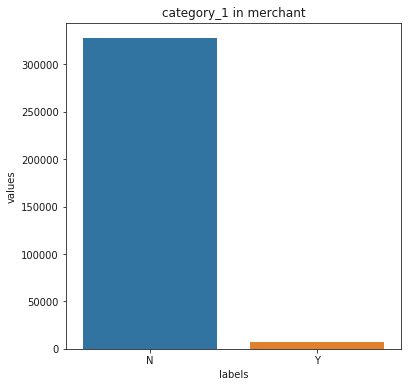

In [54]:
temp = merchant["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

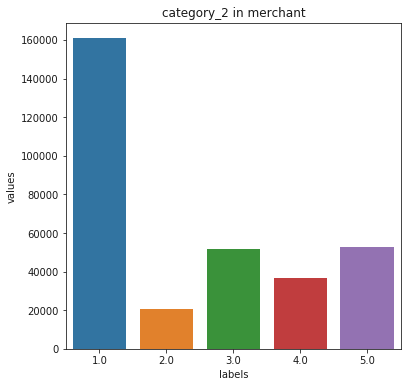

In [55]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

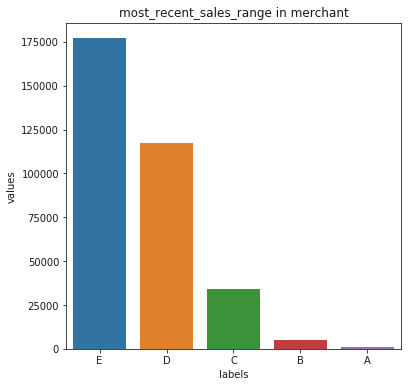

In [56]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["most_recent_sales_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_sales_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

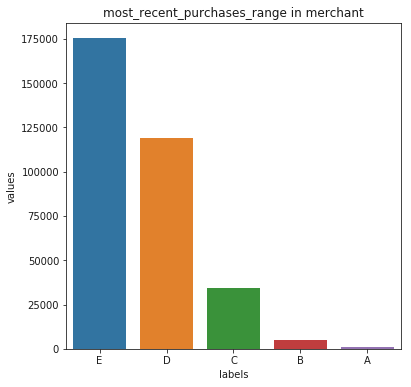

In [57]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["most_recent_purchases_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_purchases_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

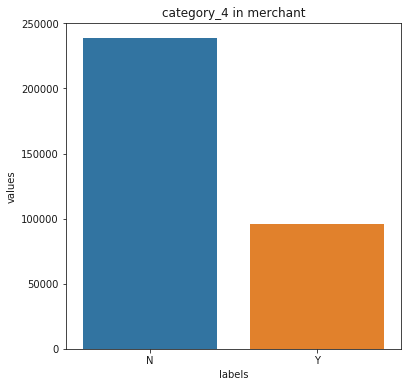

In [58]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["category_4"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_4 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [59]:
# Simple Exploration: new_merchants.csv
new_merchant = pd.read_csv("../23-Final-Project/Data/new_merchant_transactions.csv")
print("shape of new_merchant_transactions : ",new_merchant.shape)

shape of new_merchant_transactions :  (1048575, 16)


In [60]:
new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,purchase_time,AM_PM,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,3/11/2018,2:57:36,PM,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,3/19/2018,6:53:37,PM,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,4/26/2018,2:08:44,PM,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671926,3/7/2018,9:43:21,AM,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,3/22/2018,9:07:53,PM,NaN,-1,29


In [61]:
# card_id : Card identifier
# month_lag : month lag to reference date
# purchase_date : Purchase date
# authorized_flag : Y' if approved, 'N' if denied
# category_3 : anonymized category
# installments : number of installments of purchase
# category_1 : anonymized category
# merchant_category_id : Merchant category identifier (anonymized )
# subsector_id : Merchant category group identifier (anonymized )
# merchant_id : Merchant identifier (anonymized)
# purchase_amount : Normalized purchase amount
# city_id : City identifier (anonymized )
# state_id : State identifier (anonymized )
# category_2 : anonymized category

In [62]:
# checking missing data
total = new_merchant.isnull().sum().sort_values(ascending = False)
percent = (new_merchant.isnull().sum()/new_merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,52936,5.048375
category_3,26054,2.484705
merchant_id,12044,1.148606
subsector_id,0,0.000000
state_id,0,0.000000
AM_PM,0,0.000000
purchase_time,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000


In [63]:
new_merchant['authorized_flag'] = new_merchant['authorized_flag'].map({'Y':1, 'N':0})

In [64]:
def aggregate_new_transactions(new_trans):    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'month_lag': ['min', 'max']
        }
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    agg_new_trans.columns = ['new_' + '_'.join(col).strip() 
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
    
    df = (new_trans.groupby('card_id')
          .size()
          .reset_index(name='new_transactions_count'))
    
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
    
    return agg_new_trans

new_trans = aggregate_new_transactions(new_merchant)

In [65]:
train = pd.merge(train, new_trans, on='card_id', how='left')
test = pd.merge(test, new_trans, on='card_id', how='left')

In [66]:
# Make a Baseline Model
use_cols = [col for col in train.columns if col not in ['card_id', 'first_active_month']]

train = train[use_cols]
test = test[use_cols]

features = list(train[use_cols].columns)
categorical_feats = [col for col in features if 'feature_' in col]

In [67]:
for col in categorical_feats:
    print(col, 'have', train[col].value_counts().shape[0], 'categories.')

feature_1 have 5 categories.
feature_2 have 3 categories.
feature_3 have 2 categories.


In [68]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_feats:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

feature_1
feature_2
feature_3


In [69]:
df_all = pd.concat([train, test])
df_all = pd.get_dummies(df_all, columns=categorical_feats)

len_train = train.shape[0]

train = df_all[:len_train]
test = df_all[len_train:]

In [70]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


lgb_params = {"objective" : "regression", "metric" : "rmse", 
               "max_depth": 11, "min_child_samples": 20, 
               "reg_alpha": 1, "reg_lambda": 1,
               "num_leaves" : 128, "learning_rate" : 0.005, 
               "subsample" : 0.8, "colsample_bytree" : 0.8, 
               "verbosity": -1}

FOLDs = KFold(n_splits=8, shuffle=True, random_state=1989)

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))

features_lgb = list(train.columns)
feature_importance_df_lgb = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train)):
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx])

    print("LGB " + str(fold_) + "-" * 50)
    num_round = 10000
    clf = lgb.train(lgb_params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval = 400, early_stopping_rounds = 50)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / FOLDs.n_splits
    

print(np.sqrt(mean_squared_error(oof_lgb, target)))

LGB 0--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[400]	training's rmse: 3.58985	valid_1's rmse: 3.91862
[800]	training's rmse: 3.51581	valid_1's rmse: 3.91243
Early stopping, best iteration is:
[792]	training's rmse: 3.51677	valid_1's rmse: 3.91241
LGB 1--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[400]	training's rmse: 3.62174	valid_1's rmse: 3.67544
[800]	training's rmse: 3.54497	valid_1's rmse: 3.67076
Early stopping, best iteration is:
[794]	training's rmse: 3.54584	valid_1's rmse: 3.6707
LGB 2--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[400]	training's rmse: 3.60766	valid_1's rmse: 3.78127
[800]	training's rmse: 3.53293	valid_1's rmse: 3.7768
Early stopping, best iteration is:
[816]	training's rmse: 3.53087	valid_1's rmse: 3.7767
LGB 3--------------------------------------------

In [72]:
import catboost as cb

FOLDs = KFold(n_splits=8, shuffle=True, random_state=1989)

oof_cb = np.zeros(len(train))
predictions_cb = np.zeros(len(test))


for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train)):
    trn_data = cb.Pool(train.iloc[trn_idx], target.iloc[trn_idx])
    val_data = cb.Pool(train.iloc[val_idx], target.iloc[val_idx])

    print("CB " + str(fold_) + "-" * 50)
    num_round = 10000
    cb_model = cb.CatBoostRegressor(max_depth=11, learning_rate=0.005, eval_metric = 'RMSE', iterations=num_round, early_stopping_rounds=50)
    cb_model.fit(trn_data, verbose_eval = 400, eval_set = val_data)
    oof_cb[val_idx] = cb_model.predict(train.iloc[val_idx])
    predictions_cb += cb_model.predict(test) / FOLDs.n_splits

np.sqrt(mean_squared_error(oof_cb, target))

CB 0--------------------------------------------------
0:	learn: 3.8449832	test: 4.0379616	best: 4.0379616 (0)	total: 497ms	remaining: 1h 22m 51s
400:	learn: 3.7114918	test: 3.9401940	best: 3.9401940 (400)	total: 2m 35s	remaining: 1h 2m 9s
800:	learn: 3.6724670	test: 3.9295795	best: 3.9295795 (800)	total: 5m 2s	remaining: 57m 55s
1200:	learn: 3.6428655	test: 3.9252100	best: 3.9252100 (1200)	total: 7m 29s	remaining: 54m 54s
1600:	learn: 3.6166249	test: 3.9225065	best: 3.9225058 (1599)	total: 9m 55s	remaining: 52m 5s
2000:	learn: 3.5910125	test: 3.9203765	best: 3.9203450 (1988)	total: 12m 32s	remaining: 50m 8s
2400:	learn: 3.5665771	test: 3.9192473	best: 3.9191943 (2384)	total: 15m 31s	remaining: 49m 8s
2800:	learn: 3.5414307	test: 3.9179747	best: 3.9179747 (2800)	total: 18m 4s	remaining: 46m 26s
3200:	learn: 3.5170401	test: 3.9172238	best: 3.9171911 (3194)	total: 20m 29s	remaining: 43m 30s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 3.917078577
bestIteration = 3267

3.7574804965994906

In [73]:
print('lgb', np.sqrt(mean_squared_error(oof_lgb, target)))
print('cb', np.sqrt(mean_squared_error(oof_cb, target)))

lgb 3.7531202890922852
cb 3.7574804965994906


In [74]:
total_sum = 0.5 * oof_lgb + 0.5 * oof_cb
print("CV score: {:<8.5f}".format(mean_squared_error(total_sum, target)**0.5))

CV score: 3.75233 


In [75]:
sub_df = pd.read_csv('../23-Final-Project/Data/sample_submission.csv')
sub_df["target"] = 0.5 * predictions_lgb + 0.5 * predictions_cb
sub_df.to_csv("submission_ensemble_lgb_cb.csv", index=False)